In [1]:
import pandas as p
import matplotlib.pyplot as plt

In [2]:
advertisers = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\advertisers.csv")
locations = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\locations.csv")
results = p.read_csv(r"C:\Elections-Ad-Spending-Analysis\elections-data\results.csv")

In [3]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [4]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [5]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [6]:
results['State']= results['State'].str.strip().str.lower()
locations['Location name'] = locations['Location name'].str.strip().str.lower()
merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


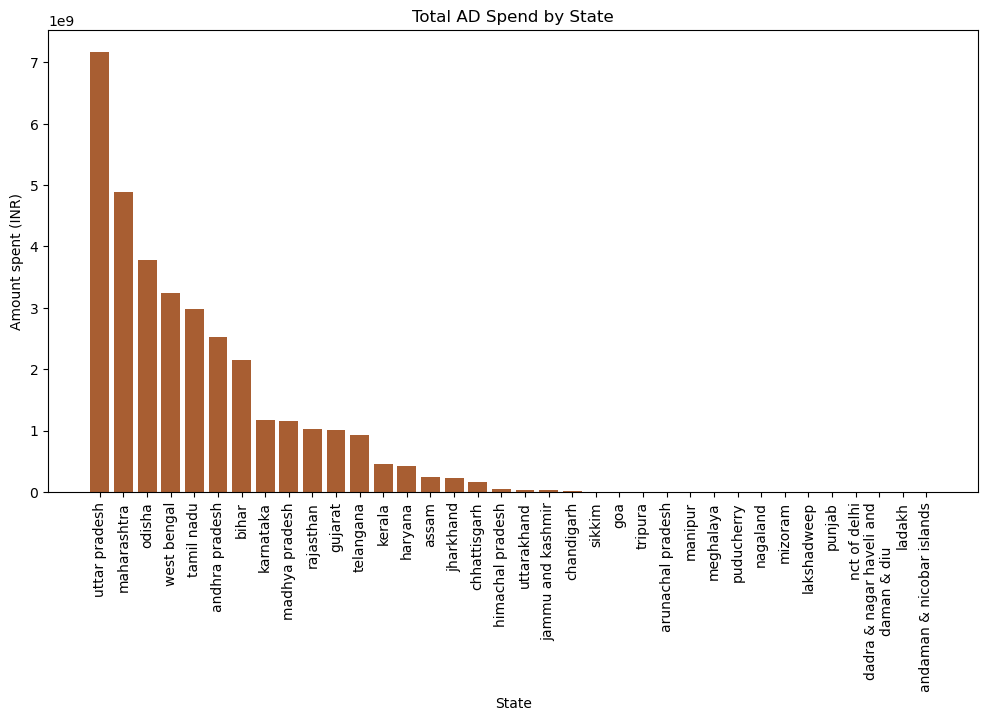

In [7]:
#AmountspendStatewise
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(state_ad_spend.index, state_ad_spend.values,color='#a85e32')
plt.title('Total AD Spend by State')
plt.xlabel('State')
plt.ylabel('Amount spent (INR)')
plt.xticks(rotation=90)
plt.show()


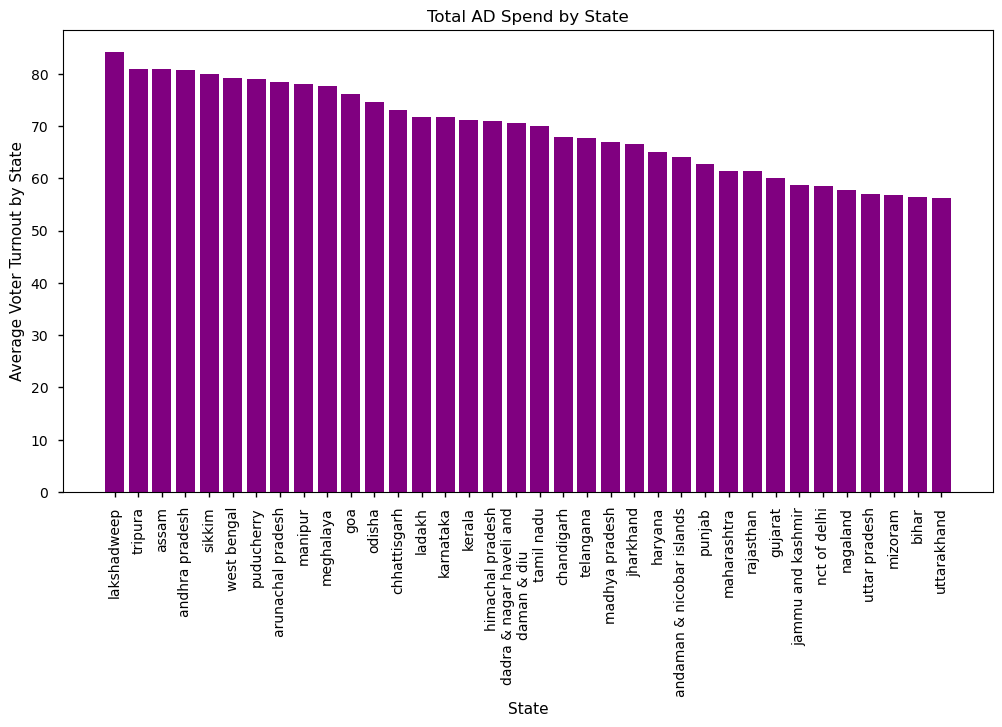

In [8]:
#Voter Turnout
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().sort_values(ascending=False)
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(12, 6))
plt.bar(state_voter_turnout.index, state_voter_turnout.values,color='purple')
plt.title('Total AD Spend by State')
plt.xlabel('State')
plt.ylabel('Average Voter Turnout by State')
plt.xticks(rotation=90)
plt.show()

In [9]:
advertisers['Amount spent (INR)'] = p.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
advertisers

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342.0,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100.0,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399.0,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327.0,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499.0,879
...,...,...,...,...,...
20827,104633268709556,If You Don't Bark,These ads ran without a disclaimer,NaN,2
20828,118271861357765,Story time,These ads ran without a disclaimer,NaN,1
20829,218017134738366,know_sacred_wisdom,These ads ran without a disclaimer,NaN,1
20830,270489126793,Energy Globe Award,These ads ran without a disclaimer,NaN,1


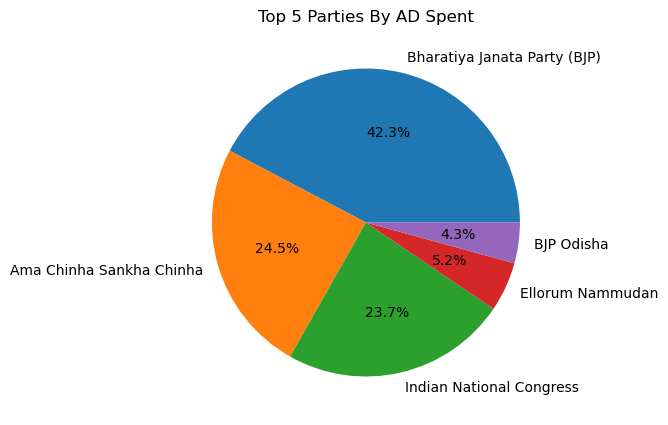

In [10]:
advertisers['Amount spent (INR)'] = p.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')
advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()
plt.figure(figsize=(15,5))
plt.title('Top 5 Parties By AD Spent')
plt.pie(top_5_parties['Amount spent (INR)'],labels=top_5_parties['Page name'],autopct='%1.1f%%')
plt.show()

In [11]:
constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)
constituency_data

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0
...,...,...,...,...,...,...,...,...,...,...
545,546,54.0,west bengal,Joynagar,1844780,80.08,1477298,NaN,west bengal,77244996.0
546,547,55.0,west bengal,Kolkata Dakshin,1849520,66.95,1238256,NaN,west bengal,77244996.0
547,548,56.0,west bengal,Kolkata Uttar,1505356,63.59,957319,NaN,west bengal,77244996.0
548,549,57.0,west bengal,Mathurapur,1817068,82.02,1490299,NaN,west bengal,77244996.0


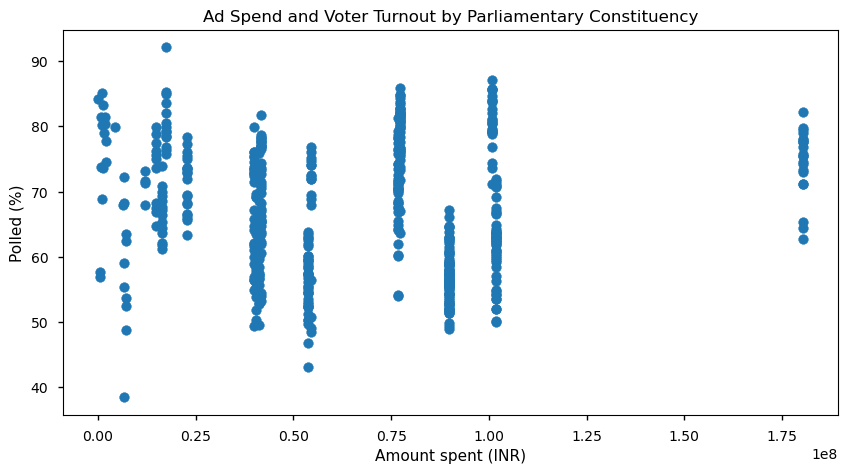

In [12]:
plt.figure(figsize=(10,5))
plt.xlabel('Amount spent (INR)')
plt.ylabel('Polled (%)')
plt.title('Ad Spend and Voter Turnout by Parliamentary Constituency')
plt.scatter(x=constituency_data['Amount spent (INR)'],y=constituency_data['Polled (%)'])
plt.show()

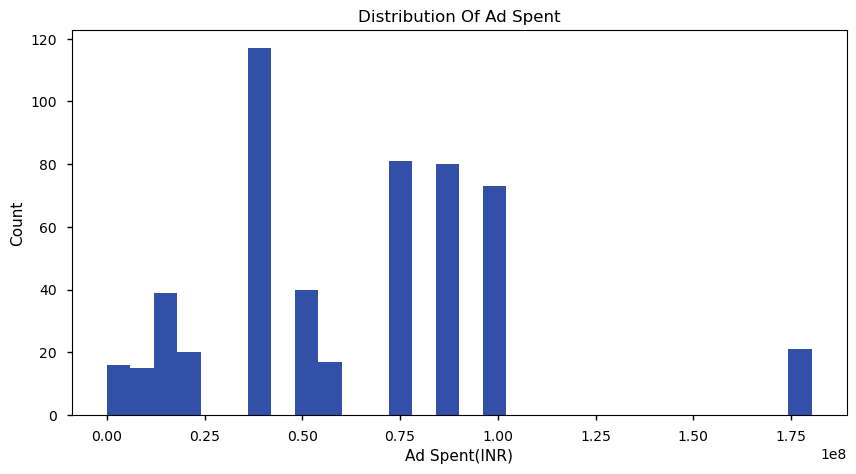

In [16]:
plt.figure(figsize=(10,5))
plt.xlabel('Ad Spent(INR)')
plt.ylabel('Count')
plt.title('Distribution Of Ad Spent')
plt.hist(merged_data['Amount spent (INR)'],bins=30,color='#3250a8')
plt.show()

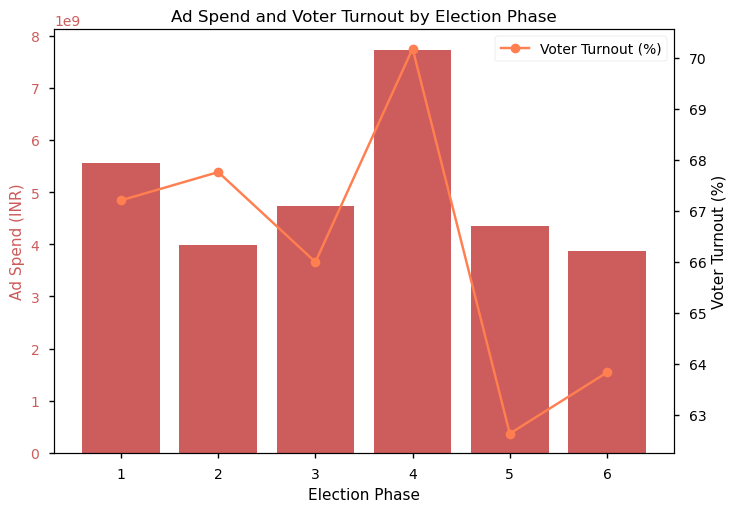

In [14]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()
fig, ax1 = plt.subplots()

# Plot Ad Spend on the primary y-axis
ax1.bar(phase_analysis["Phase"], phase_analysis["Amount spent (INR)"], color='indianred', label="Ad Spend (INR)")
ax1.set_xlabel("Election Phase")
ax1.set_ylabel("Ad Spend (INR)", color='indianred')
ax1.tick_params(axis='y', labelcolor='indianred')

# Create a secondary y-axis for Voter Turnout
ax2 = ax1.twinx()
ax2.plot(phase_analysis["Phase"], phase_analysis["Polled (%)"], color='coral', label="Voter Turnout (%)", marker='o')
ax2.set_ylabel("Voter Turnout (%)",)
ax2.tick_params(axis='y')

# Set the title and legend
plt.title("Ad Spend and Voter Turnout by Election Phase")
plt.legend()

# Show the plot
plt.show()